In [31]:
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torchview import draw_graph
import numpy as np
from sklearn.model_selection import train_test_split
from typing import Tuple

In [14]:
sns.set(rc={'figure.figsize': (10, 7)})
sns.set(rc={'figure.dpi': 100})
sns.set(style='white', palette='muted', font_scale=1.2)

In [1]:
! gdown 1tMYar9-XcNZ1Nz5xaxFyi-iYIkW4Ey_k

Downloading...
From: https://drive.google.com/uc?id=1tMYar9-XcNZ1Nz5xaxFyi-iYIkW4Ey_k
To: c:\Users\musta\pycharm_Projects\pytorch_00\penguins.csv

  0%|          | 0.00/15.2k [00:00<?, ?B/s]
100%|██████████| 15.2k/15.2k [00:00<?, ?B/s]


In [7]:
df = pd.read_csv('penguins.csv').dropna()
df.shape

(333, 8)

In [8]:
df.species.value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

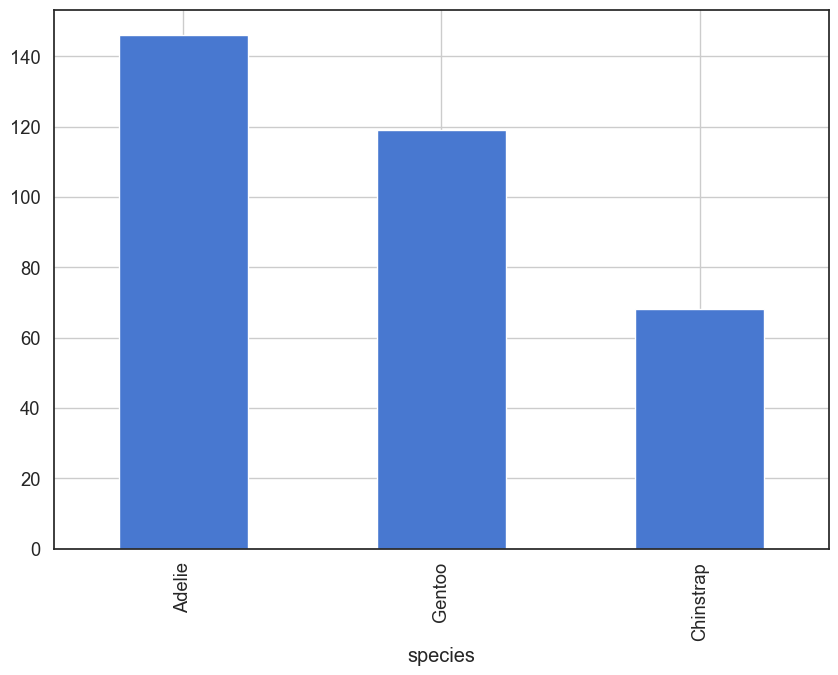

In [11]:
df.species.value_counts().plot(kind='bar').grid()

In [27]:
train_set, test_set = train_test_split(df, test_size=0.2)

In [28]:
train_set

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
254,Gentoo,Biscoe,47.2,15.5,215.0,4975.0,female,2009
180,Gentoo,Biscoe,48.2,14.3,210.0,4600.0,female,2007
30,Adelie,Dream,39.5,16.7,178.0,3250.0,female,2007
245,Gentoo,Biscoe,49.5,16.1,224.0,5650.0,male,2009
168,Gentoo,Biscoe,42.0,13.5,210.0,4150.0,female,2007
...,...,...,...,...,...,...,...,...
76,Adelie,Torgersen,40.9,16.8,191.0,3700.0,female,2008
144,Adelie,Dream,37.3,16.8,192.0,3000.0,female,2009
74,Adelie,Torgersen,35.5,17.5,190.0,3700.0,female,2008
91,Adelie,Dream,41.1,18.1,205.0,4300.0,male,2008


In [29]:
train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)


In [30]:
train_set.shape, test_set.shape

((266, 8), (67, 8))

In [36]:
SPECIES_MAP={
    'Adeli':0,
    'Chinstrap':1,
    'Gentoo':2
}
def create_Dataset(data: pd.DataFrame) -> Tuple[torch.Tensor, torch.Tensor]:
    features = torch.tensor(
        data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].to_numpy(), dtype=torch.float
    )
    labels = torch.tensor(data.species.map(SPECIES_MAP), dtype=torch.long)
    return features, labels

In [37]:
X_train, y_train = create_Dataset(train_set)

RuntimeError: value cannot be converted to type int64 without overflow